In [1]:
import pandas as pd
import os
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# set dir
os.chdir(r'D:\code\github\Unified_Yeast_GEMs_Database')

In [2]:
# load SNP data
df=pd.read_csv(r'code/SNP_analysis/output/human_bioethanol_dairy_wt_genotype.tsv',sep='\t')

# filter: remove rows with missing values
nan_count=df.isna().sum(axis=1)
df=df[nan_count<1]
df

,chromosome,position,QUAL,type,ref,alt,gene,effect,impact_level,LOF,...,CNP_1.re,CNQ_1.re,CNR_1.re,CNS_4.re,CNT_4.re,CNV_4.re,MAL.re,YCM.re,YCR.re,YCY.re
336,chromosome1,11946,156369.96,SNV,G,A,YAL065C_CDS,synonymous_variant,LOW,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
682,chromosome1,33435,255436.86,SNV,A,G,YAL061W_CDS,upstream_gene_variant,MODIFIER,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
683,chromosome1,33436,343834.79,SNV,A,G,YAL061W_CDS,upstream_gene_variant,MODIFIER,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
684,chromosome1,33444,361927.53,SNV,C,T,YAL061W_CDS,upstream_gene_variant,MODIFIER,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
685,chromosome1,33483,346146.27,SNV,C,T,YAL061W_CDS,synonymous_variant,LOW,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126672,chromosome16,936324,188403.87,SNV,A,G,YPR198W-YPR199C,intergenic_region,MODIFIER,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
126674,chromosome16,936415,165653.04,SNV,A,C,YPR198W-YPR199C,intergenic_region,MODIFIER,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
126679,chromosome16,936593,336124.91,SNV,A,G,YPR198W-YPR199C,intergenic_region,MODIFIER,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
126681,chromosome16,936623,358789.83,DEL,GC,G,YPR198W-YPR199C,intergenic_region,MODIFIER,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
# build label
df_strain_info=pd.read_excel(r'data/1897_strains_info.xlsx', index_col=0)
wildtypelist=['14. CHNIII ','20. CHN V ', '15. CHNII ','17. Taiwanese ', '24. Asian islands ', '18. Far East Asia ', '19. Malaysian ', '22. Far East Russian ']
wt_strainList=df_strain_info[(df_strain_info['nature_clade'].isin(wildtypelist)) & (df_strain_info['type']=='Wild')].index.tolist()
bioethanol_strainList=df_strain_info[(df_strain_info['nature_clade']=='3. Brazilian bioethanol ') & (df_strain_info['type']=='Industry')].index.tolist()
human_strainList=df_strain_info[(df_strain_info['nature_clade']=='10. French Guiana human ')&(df_strain_info['type']=='Human')].index.tolist()
dairy_strainList=df_strain_info[(df_strain_info['nature_clade']=='5. French dairy ')&(df_strain_info['type']=='Fermentation')].index.tolist()
label_dict={'Wild-type':wt_strainList,'Bioethanol':bioethanol_strainList,'Human':human_strainList,'Dairy':dairy_strainList}

In [42]:
def pca_analysis(data, label_dict,plot=True,title='PCA'):
    
    total_strainlist=[]
    for list in label_dict.values():
        total_strainlist.extend(list)
    data=data[total_strainlist].T
    # print(data)
    
    for type,list in label_dict.items():
        data.loc[data.index.isin(list), 'Type'] = type
    # print(data['Type'])
    # standardize
    data_st=StandardScaler().fit_transform(data.drop('Type',axis=1))

    # PCA
    pca = PCA(n_components=2)
    principalComponents = pca.fit_transform(data_st)

    pca_explained = pca.explained_variance_ratio_
    pca_explained=[round(i*100,1) for i in pca_explained]
    print('Explained variance ratio:',pca_explained)
    df_output= pd.DataFrame(data = principalComponents
                 , columns = ['PC1', 'PC2'],index=data.index)
    
    df_output['Type']=data['Type']
    if plot:
        sns.scatterplot(data=df_output,x='PC1',y='PC2',hue='Type')
        plt.title(title)
        # set label
        plt.xlabel('PC1 ({}%)'.format(pca_explained[0]))
        plt.ylabel('PC2 ({}%)'.format(pca_explained[1]))
        plt.show()
    return df_output

Explained variance ratio: [62.7, 16.0]


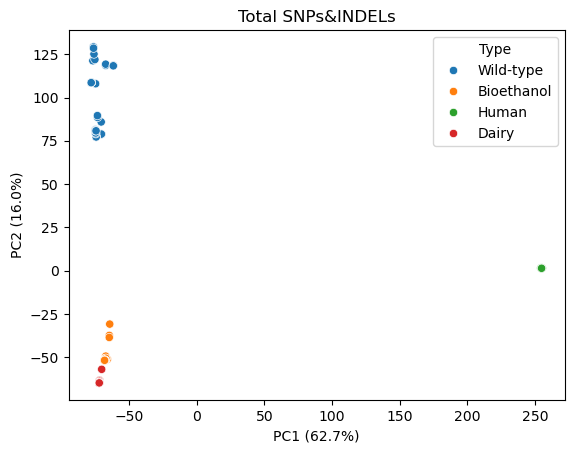

In [43]:
df_whole_pca=pca_analysis(df,label_dict,title='Total SNPs&INDELs')
pca_explained_ratio=[62.7,16.0]

C:\Users\wangh\AppData\Local\Temp\ipykernel_19812\2023704365.py:10: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  sns.scatterplot(x='PC1',y='PC2',hue='Type',data=df_whole_pca,ax=axes,palette=colors_set)


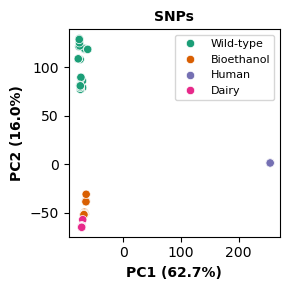

In [44]:
colors_set=sns.color_palette('Dark2')
colors_set
axis_fontdict={'fontsize':8,'fontweight':'bold'}
label_fontdict={'fontsize':10,'fontweight':'bold'}
title_fontdict={'fontsize':12,'fontweight':'bold'}


fig,axes=plt.subplots(1,1,figsize=(3,3))
# plot gene pca
sns.scatterplot(x='PC1',y='PC2',hue='Type',data=df_whole_pca,ax=axes,palette=colors_set)
axes.set_xlabel(f'PC1 ({pca_explained_ratio[0]}%)',fontdict=label_fontdict)
axes.set_ylabel(f'PC2 ({pca_explained_ratio[1]}%)',fontdict=label_fontdict)
axes.set_title('SNPs',fontdict=label_fontdict)
# set xlim
# axes.set_xlim(-40,80)
# set ylim
# axes.set_ylim(-30,40)
# remove legend title
axes.legend(loc='upper right',fontsize=8,title='')
plt.tight_layout()
# save figure
fig.savefig(r'figures/output/figure5_SNPs_pca.svg',dpi=400,bbox_inches='tight',transparent=True)
plt.show()

In [45]:
# save df_whole_pca
df_whole_pca.to_csv(r'code/SNP_analysis/output/SNPs_pca_output.csv')

#### Splite by impact level

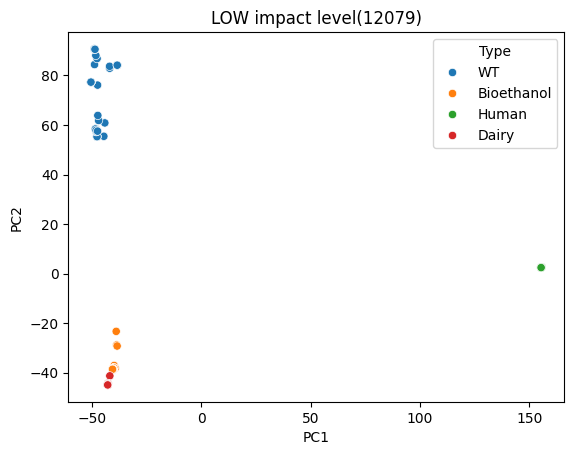

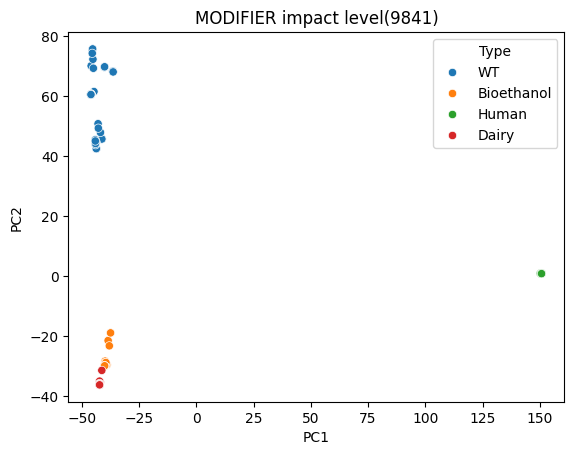

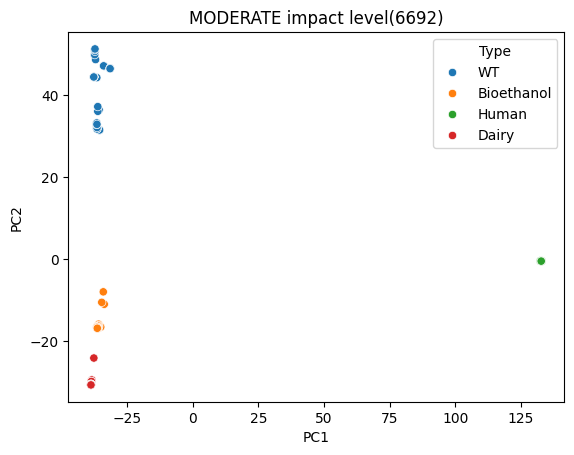

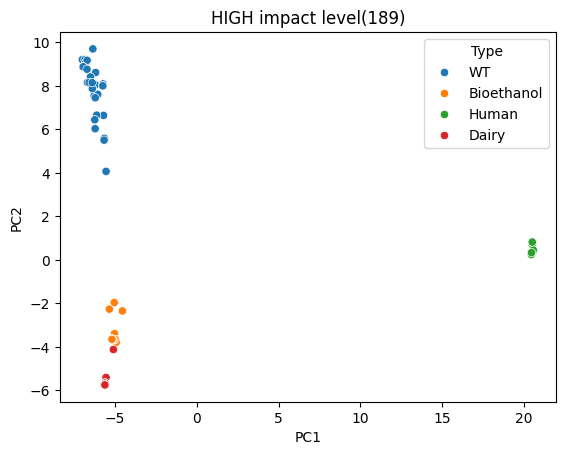

In [68]:
# split by impact level
for level in df['impact_level'].unique():
    df_level_pca=pca_analysis(df[df['impact_level']==level],label_dict,title=f'{level} impact level({len(df[df["impact_level"]==level])})')

#### SNP vs INDEL

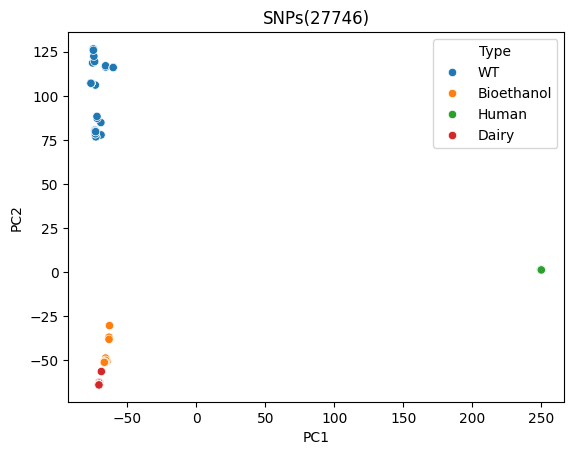

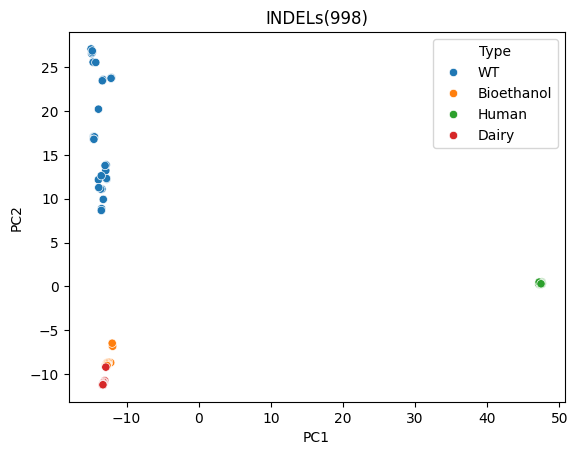

In [69]:
# split by type: SNP, INDEL
df_snp=df[df['type']=='SNV']
df_snp_pca=pca_analysis(df_snp,label_dict,title=f'SNPs({len(df_snp)})')

df_indel=df[df['type'].isin(['INDEL','INS','DEL'])]
df_indel_pca=pca_analysis(df_indel,label_dict,title=f'INDELs({len(df_indel)})')


#### LOF vs other

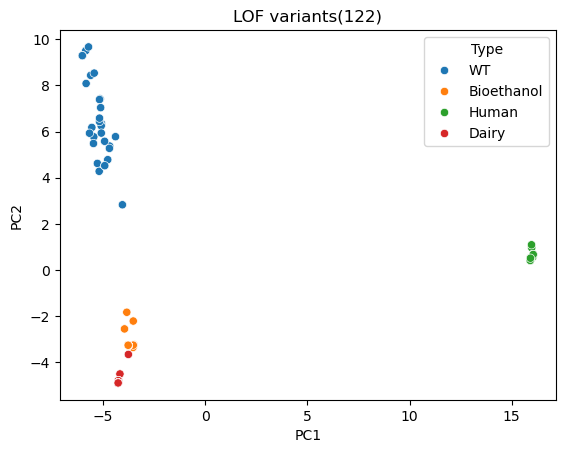

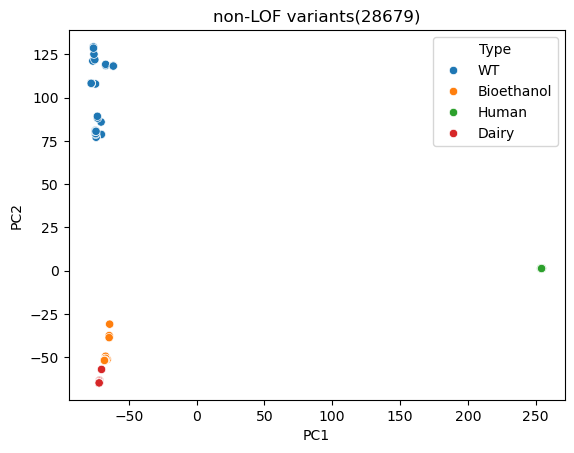

In [5]:
df_lof=df[df['LOF']==1]
df_lof_pca=pca_analysis(df_lof,label_dict,title=f'LOF variants({len(df_lof)})')

df_nonlof=df[df['LOF']==0]
df_nonlof_pca=pca_analysis(df_nonlof,label_dict,title=f'non-LOF variants({len(df_nonlof)})')

In [19]:
df['effect'].value_counts()

effect
synonymous_variant                                      12045
missense_variant                                         6624
upstream_gene_variant                                    6609
downstream_gene_variant                                  2117
intergenic_region                                         765
intragenic_variant                                        187
intron_variant                                            137
frameshift_variant                                        118
stop_gained                                                43
splice_region_variant&stop_retained_variant                27
non_coding_transcript_variant                              26
disruptive_inframe_insertion                               22
disruptive_inframe_deletion                                19
conservative_inframe_insertion                             15
start_lost                                                 13
conservative_inframe_deletion                              11
s

#### LOF functional analysis

In [74]:
# df_lof=df[df['LOF']==1]
df_lof=df[df['impact_level']=='HIGH']
lof_geneList=df_lof['gene'].unique().tolist()
lof_geneList=[g.rstrip('_CDS') for g in lof_geneList]
df_lof['gene']=df_lof['gene'].apply(lambda x: x.replace('_CDS',''))
# remove duplicated genes
df_lof=df_lof.drop_duplicates(subset='gene')
df_lof.head()

C:\Users\wangh\AppData\Local\Temp\ipykernel_42336\2886836521.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lof['gene']=df_lof['gene'].apply(lambda x: x.replace('_CDS',''))


,chromosome,position,QUAL,type,ref,alt,gene,effect,impact_level,LOF,...,CNP_1.re,CNQ_1.re,CNR_1.re,CNS_4.re,CNT_4.re,CNV_4.re,MAL.re,YCM.re,YCR.re,YCY.re
1337,chromosome1,77531,702652.74,DEL,GAA,G,YAL035W,frameshift_variant,HIGH,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1522,chromosome1,95388,2722515.85,SNV,A,G,YAL026C-A,stop_lost&splice_region_variant,HIGH,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
1940,chromosome1,141219,345148.18,SNV,C,T,YAL004W,stop_gained,HIGH,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4546,chromosome2,220240,312867.69,SNV,T,C,YBL005W,stop_gained,HIGH,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5298,chromosome2,294204,263470.92,INS,A,AC,YBR027C,frameshift_variant,HIGH,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
# load functional annotation
df_annotation=pd.read_excel(r'data/genome/scepan1807_functional_annotation_uniprot.xlsx',index_col=0)
df_annotation.head()

,Entry,Entry Name,Gene Names (ordered locus),Protein names,Catalytic activity,EC number,Function [CC],Pathway,Annotation,Gene Ontology (biological process),...,Gene Ontology IDs,Subcellular location [CC],BioCyc,PathwayCommons,Rhea ID,uniprot_id,similarity,Organism,Function [CC].1,Taxonomic lineage
YAL001C,P34111,TFC3_YEAST,YAL001C,Transcription factor tau 138 kDa subunit (TFII...,NaN,NaN,FUNCTION: TFIIIC mediates tRNA and 5S RNA gene...,NaN,5.0,5S class rRNA transcription by RNA polymerase ...,...,GO:0000127; GO:0003677; GO:0005634; GO:0005654...,SUBCELLULAR LOCATION: Nucleus. Mitochondrion.,YEAST:G3O-28816-MONOMER;,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YAL002W,P39702,VPS8_YEAST,YAL002W,Vacuolar protein sorting-associated protein 8 ...,NaN,NaN,FUNCTION: Required for localization and recycl...,NaN,5.0,endosomal vesicle fusion [GO:0034058]; late en...,...,GO:0005770; GO:0005795; GO:0006623; GO:0016020...,"SUBCELLULAR LOCATION: Golgi apparatus, Golgi s...",YEAST:G3O-28817-MONOMER;,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YAL003W,P32471,EF1B_YEAST,YAL003W,Elongation factor 1-beta (EF-1-beta) (Eukaryot...,NaN,NaN,FUNCTION: Catalytic subunit of the guanine nuc...,PATHWAY: Protein biosynthesis; polypeptide cha...,5.0,maintenance of translational fidelity [GO:1990...,...,GO:0003746; GO:0005085; GO:0005829; GO:0005840...,NaN,YEAST:G3O-28818-MONOMER;,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YAL004W,P39703,YAA4_YEAST,YAL004W,Putative uncharacterized protein YAL004W,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YAL008W,P18411,FUN14_YEAST,YAL008W,Protein FUN14,NaN,NaN,NaN,NaN,3.0,autophagy of mitochondrion [GO:0000422]; mitoc...,...,GO:0000422; GO:0005739; GO:0005741; GO:0007005...,SUBCELLULAR LOCATION: Membrane {ECO:0000305}; ...,YEAST:G3O-28821-MONOMER;,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [75]:
def calculate_freq(df,strainlist):
    df_data=df[strainlist]
    df_freq=df_data.sum(axis=1)/len(strainlist)
    df_freq.index=df['gene'].values.tolist()
    return df_freq

df_freq=pd.DataFrame(index=df_lof['gene'])
df_freq['WT']=calculate_freq(df_lof,wt_strainList)
df_freq['Bioethanol']=calculate_freq(df_lof,bioethanol_strainList)
df_freq['Human']=calculate_freq(df_lof,human_strainList)
df_freq['Dairy']=calculate_freq(df_lof,dairy_strainList)
df_freq['Total']=calculate_freq(df_lof,wt_strainList+bioethanol_strainList+human_strainList+dairy_strainList)
df_freq


,WT,Bioethanol,Human,Dairy,Total
gene,,,,,
YAL035W,0.166667,0.0,0.375,0.000000,0.132075
YAL026C-A,0.900000,0.0,0.000,0.000000,0.254717
YAL004W,0.000000,0.0,1.000,0.000000,0.226415
YBL005W,0.000000,0.0,1.000,0.000000,0.226415
YBR027C,0.000000,0.0,1.000,0.000000,0.226415
...,...,...,...,...,...
YPR053C,0.000000,0.0,0.000,0.954545,0.198113
YPR071W,0.000000,0.0,1.000,0.000000,0.226415
YPR152C,0.000000,0.0,1.000,0.000000,0.226415


In [76]:
# do Chi-square test for each clade to WT
import numpy as np
from scipy.stats import chi2_contingency

def calculate_chi_square(vector1,vector2):
    df_contingency = pd.crosstab(vector1, vector2)
    chi2, p, dof, expected = chi2_contingency(df_contingency)
    return p

def calculate_clade_chi(df,clade1_strainList,clade2_strainList):
    # set gene as index
    df=df.set_index('gene')
    df_chi_result=pd.Series(index=df.index)
    for gene in df.index:
        presence_vector=df.loc[gene,clade1_strainList+clade2_strainList]
        label_vector=[1]*len(clade1_strainList)+[0]*len(clade2_strainList)
        p=calculate_chi_square(presence_vector,label_vector)
        df_chi_result[gene]=p
    return df_chi_result

df_chi=pd.DataFrame(index=df_lof['gene'])
df_chi['Bioethanol_WT']=calculate_clade_chi(df_lof,bioethanol_strainList,wt_strainList)
df_chi['Human_WT']=calculate_clade_chi(df_lof,human_strainList,wt_strainList)
df_chi['Dairy_WT']=calculate_clade_chi(df_lof,dairy_strainList,wt_strainList)
df_chi['WT_WT']=calculate_clade_chi(df_lof,wt_strainList,wt_strainList)
# sort by Human_WT
df_chi=df_chi.sort_values(by='Human_WT',ascending=True)
df_chi

,Bioethanol_WT,Human_WT,Dairy_WT,WT_WT
gene,,,,
YIL032C,1.000000,1.517270e-12,1.000000e+00,1.0
YLL061W,1.000000,1.517270e-12,1.000000e+00,1.0
YKR061W,1.000000,1.517270e-12,1.000000e+00,1.0
YKL129C,1.000000,1.517270e-12,1.000000e+00,1.0
YJR071W,1.000000,1.517270e-12,1.000000e+00,1.0
...,...,...,...,...
YMR057C,0.083265,1.000000e+00,2.611084e-03,1.0
YPR053C,1.000000,1.000000e+00,3.038110e-11,1.0
YGR153W,1.000000,1.000000e+00,3.038110e-11,1.0


In [77]:
p_threshold=0.001
human_specific_lofs=df_chi[df_chi['Human_WT']<p_threshold].index.tolist()
dairy_specific_lofs=df_chi[df_chi['Dairy_WT']<p_threshold].index.tolist()
bioethanol_specific_lofs=df_chi[df_chi['Bioethanol_WT']<p_threshold].index.tolist()
print(f'Human specific LOFs: {len(human_specific_lofs)}')
print(f'Dairy specific LOFs: {len(dairy_specific_lofs)}')
print(f'Bioethanol specific LOFs: {len(bioethanol_specific_lofs)}')

Human specific LOFs: 130
Dairy specific LOFs: 39
Bioethanol specific LOFs: 46


In [78]:
from gseapy import barplot
import gseapy as gp
def enr_analysis(rxnList,pathway_dict,background,title='enrichment analysis'):
    enr=gp.enrichr(gene_list=rxnList,
                   gene_sets=pathway_dict,
                   background=background,
                   outdir=None,
                   no_plot=True)
    
    # plot
    try:
        ax=barplot(enr.res2d,
                column='Adjusted P-value',
                    title=title,cutoff=0.05,figsize=(4,2))
    except:
        print('No significant enrichment')
    return enr.res2d

# load GO term geneset
import json
with open(r'data/sce_pan1807_GO_geneset.json') as f:
    go_term_geneset=json.load(f)


No significant enrichment
No significant enrichment


d:\softwares\programming\anoconda\envs\data\Lib\site-packages\gseapy\plot.py:689: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(


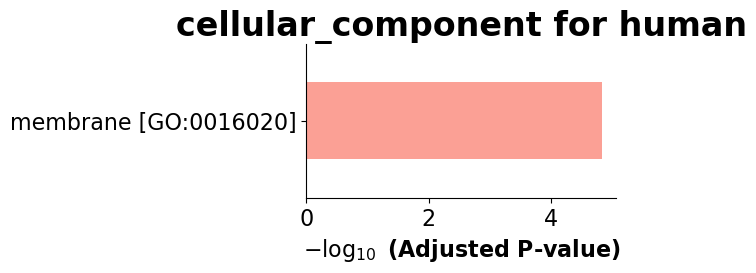

In [79]:
# for human
for type,dict in go_term_geneset.items():
    enr_res=enr_analysis(human_specific_lofs,dict,background=None,title=f'{type} for human')

No significant enrichment
No significant enrichment


d:\softwares\programming\anoconda\envs\data\Lib\site-packages\gseapy\plot.py:689: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(


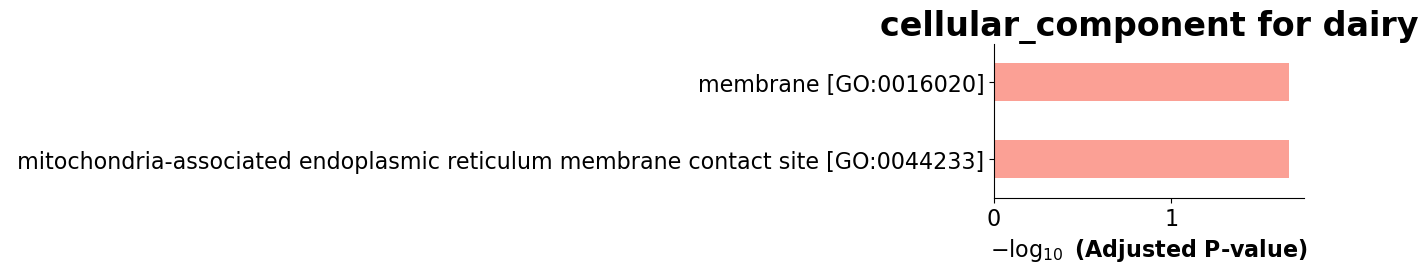

In [80]:
# for dairy
for type,dict in go_term_geneset.items():
    enr_res=enr_analysis(dairy_specific_lofs,dict,background=None,title=f'{type} for dairy')

No significant enrichment
No significant enrichment


d:\softwares\programming\anoconda\envs\data\Lib\site-packages\gseapy\plot.py:689: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(


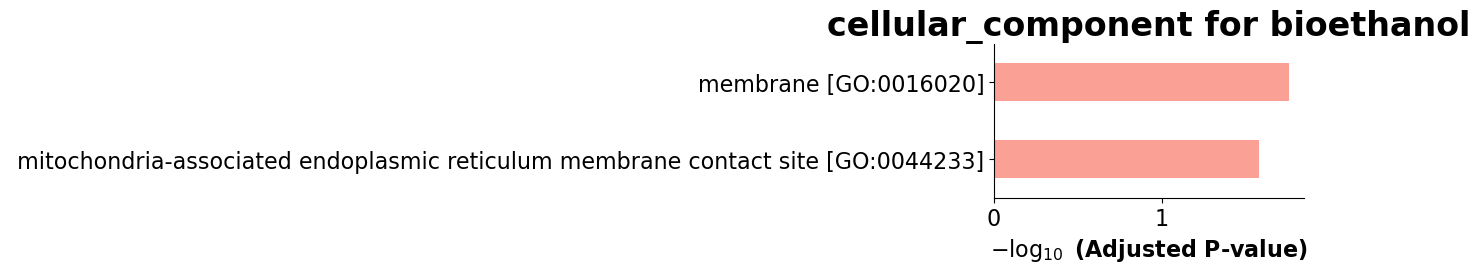

In [81]:
# for bioethanol
for type,dict in go_term_geneset.items():
    enr_res=enr_analysis(bioethanol_specific_lofs,dict,background=None,title=f'{type} for bioethanol')

In [82]:
# extract specific lofs only p value < 0.001 in Human_WT, and other value >0.05
# sort by Human_WT
df_chi=df_chi.sort_values(by='Human_WT',ascending=True)
human_specific_lofs=df_chi[(df_chi['Human_WT']<0.001) & (df_chi['Dairy_WT']>0.05) & (df_chi['Bioethanol_WT']>0.05)].index.tolist()
print(f'Human specific LOFs: {len(human_specific_lofs)}')
for type,dict in go_term_geneset.items():
    enr_res=enr_analysis(human_specific_lofs,dict,background=None,title=f'{type} for human specific lofs')

df_annotation.loc[df_annotation.index.isin(human_specific_lofs),]
# enr_res=enr_analysis(human_specific_lofs,go_term_geneset['biological_process'],background=None,title=f'Biological process for human')

Human specific LOFs: 92
No significant enrichment
No significant enrichment
No significant enrichment


,Entry,Entry Name,Gene Names (ordered locus),Protein names,Catalytic activity,EC number,Function [CC],Pathway,Annotation,Gene Ontology (biological process),...,Gene Ontology IDs,Subcellular location [CC],BioCyc,PathwayCommons,Rhea ID,uniprot_id,similarity,Organism,Function [CC].1,Taxonomic lineage
YAL004W,P39703,YAA4_YEAST,YAL004W,Putative uncharacterized protein YAL004W,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YGR189C,P53301,CRH1_YEAST,YGR189C,Probable glycosidase CRH1 (EC 3.2.-.-) (Congo ...,NaN,3.2.-.-,FUNCTION: Probable glycosidase that plays a ro...,NaN,5.0,carbohydrate metabolic process [GO:0005975]; c...,...,GO:0000131; GO:0004553; GO:0005576; GO:0005975...,"SUBCELLULAR LOCATION: Secreted, cell wall. Mem...",YEAST:G3O-30879-MONOMER;,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YGR201C,P42936,YG4D_YEAST,YGR201C,Putative elongation factor 1 gamma homolog,NaN,NaN,NaN,NaN,2.0,translational elongation [GO:0006414],...,GO:0005634; GO:0005737; GO:0006414,NaN,YEAST:G3O-30886-MONOMER;,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YGR203W,P42937,YCH1_YEAST,YGR203W,CDC25-like phosphatase YCH1 (EC 3.1.3.-) (CDC2...,NaN,3.1.3.-,FUNCTION: Protein phosphatase. {ECO:0000269|Pu...,NaN,4.0,NaN,...,GO:0004725; GO:0004792; GO:0005634; GO:0005737...,SUBCELLULAR LOCATION: Cytoplasm {ECO:0000269|P...,YEAST:G3O-30887-MONOMER;,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YIR013C,P40569,GAT4_YEAST,YIR013C,Protein GAT4,NaN,NaN,NaN,NaN,2.0,cellular response to zinc ion starvation [GO:0...,...,GO:0005634; GO:0008270; GO:0034224; GO:0043565...,NaN,YEAST:G3O-31434-MONOMER;,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YOL063C,Q08226,CRT10_YEAST,YOL063C,Protein CRT10 (Constitutive RNR transcription ...,NaN,NaN,FUNCTION: Substrate targeting component of a c...,NaN,3.0,nonfunctional rRNA decay [GO:0070651],...,GO:0070651,NaN,YEAST:G3O-33471-MONOMER;,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YOR170W,Q08543,YO170_YEAST,YOR170W,Putative uncharacterized protein YOR170W,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YGR064W,P53240,YG27_YEAST,YGR064W,Putative uncharacterized protein YGR064W,NaN,NaN,NaN,NaN,1.0,regulation of cell size [GO:0008361],...,GO:0008361,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YGR073C,P53247,YG2E_YEAST,YGR073C,Putative uncharacterized protein YGR073C,NaN,NaN,NaN,NaN,1.0,NaN,...,GO:0016020,SUBCELLULAR LOCATION: Membrane {ECO:0000305}; ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [83]:
# extract specific lofs only p value < 0.001 in Dairy_WT, and other value >0.05
dairy_specific_lofs=df_chi[(df_chi['Dairy_WT']<0.01) & (df_chi['Human_WT']>0.05) & (df_chi['Bioethanol_WT']>0.05)].index.tolist()
print(f'Dairy specific LOFs: {len(dairy_specific_lofs)}')
df_annotation.loc[dairy_specific_lofs]

Dairy specific LOFs: 9


KeyError: "['YEL069C'] not in index"

In [84]:
# extract specific lofs only p value < 0.001 in Bioethanol_WT, and other value >0.05
bioethanol_specific_lofs=df_chi[(df_chi['Bioethanol_WT']<0.01) & (df_chi['Human_WT']>0.05) & (df_chi['Dairy_WT']>0.05)].index.tolist()
print(f'Bioethanol specific LOFs: {len(bioethanol_specific_lofs)}')

Bioethanol specific LOFs: 1


#### analysis metabolic LOF genes

In [86]:
import cobra
panModel=cobra.io.read_sbml_model(r'model/panYeast.xml')
met_geneList=[gene.id for gene in panModel.genes]

lof_met_geneList=list(set(met_geneList).intersection(set(lof_geneList)))
# lof_met_geneList
print('Metabolic LOFs frequence:')
print(df_freq.loc[lof_met_geneList,])
print('Metabolic LOFs chi test value:')
print(df_chi.loc[lof_met_geneList,])

'' is not a valid SBML 'SId'.


Metabolic LOFs frequence:
               WT  Bioethanol  Human  Dairy     Total
gene                                                 
YAL035W  0.166667         0.0  0.375    0.0  0.132075
YPR192W  0.000000         0.0  1.000    0.0  0.226415
YKR061W  0.000000         0.0  1.000    0.0  0.226415
YLL061W  0.000000         0.0  1.000    0.0  0.226415
YDL168W  0.166667         0.0  1.000    0.0  0.273585
YBR199W  0.433333         0.0  0.000    0.0  0.122642
YDR373W  0.000000         0.0  1.000    0.0  0.226415
YLR342W  0.666667         0.0  0.000    0.0  0.188679
Metabolic LOFs chi test value:
         Bioethanol_WT      Human_WT  Dairy_WT  WT_WT
gene                                                 
YAL035W   6.170669e-02  1.546062e-01  0.124032    1.0
YPR192W   1.000000e+00  1.517270e-12  1.000000    1.0
YKR061W   1.000000e+00  1.517270e-12  1.000000    1.0
YLL061W   1.000000e+00  1.517270e-12  1.000000    1.0
YDL168W   6.170669e-02  5.611043e-09  0.124032    1.0
YBR199W   1.696288e-04  7

In [25]:
df_annotation.loc[lof_met_geneList,]

,Entry,Entry Name,Gene Names (ordered locus),Protein names,Catalytic activity,EC number,Function [CC],Pathway,Annotation,Gene Ontology (biological process),...,Gene Ontology IDs,Subcellular location [CC],BioCyc,PathwayCommons,Rhea ID,uniprot_id,similarity,Organism,Function [CC].1,Taxonomic lineage
YPR192W,P0CD91,AQY1_YEAST,YPR192W,Aquaporin-1,NaN,NaN,FUNCTION: Water channel required to facilitate...,NaN,5.0,ascospore formation [GO:0030437]; transmembran...,...,GO:0005783; GO:0005789; GO:0005886; GO:0006833...,SUBCELLULAR LOCATION: Endoplasmic reticulum me...,YEAST:G3O-34314-MONOMER;,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YKR061W,P33550,KTR2_YEAST,YKR061W,Probable mannosyltransferase KTR2 (EC 2.4.1.-),NaN,2.4.1.-,FUNCTION: Involved in N-linked glycosylation. ...,PATHWAY: Protein modification; protein glycosy...,4.0,cell wall mannoprotein biosynthetic process [G...,...,GO:0000026; GO:0000030; GO:0000032; GO:0000139...,SUBCELLULAR LOCATION: Golgi apparatus membrane...,YEAST:G3O-32029-MONOMER;,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YDR373W,Q06389,NCS1_YEAST,YDR373W,Calcium-binding protein NCS-1,NaN,NaN,FUNCTION: Regulator of phosphatidylinositol 4-...,NaN,5.0,regulation of signal transduction [GO:0009966],...,GO:0000139; GO:0005509; GO:0005829; GO:0008047...,SUBCELLULAR LOCATION: Bud membrane {ECO:000026...,YEAST:G3O-29923-MONOMER;,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YLL061W,Q12372,MMP1_YEAST,YLL061W,S-methylmethionine permease 1,NaN,NaN,FUNCTION: High-affinity S-methylmethionine (SM...,NaN,4.0,amino acid transmembrane transport [GO:0003333...,...,GO:0000100; GO:0003333; GO:0005783; GO:0005886...,SUBCELLULAR LOCATION: Membrane {ECO:0000269|Pu...,YEAST:G3O-32158-MONOMER;,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YAL035W,P39730,IF2P_YEAST,YAL035W,Eukaryotic translation initiation factor 5B (e...,CATALYTIC ACTIVITY: Reaction=GTP + H2O = GDP +...,3.6.5.3,FUNCTION: Plays a role in translation initiati...,NaN,5.0,cytosolic ribosome assembly [GO:0042256]; form...,...,GO:0000462; GO:0001732; GO:0003743; GO:0003924...,SUBCELLULAR LOCATION: Cytoplasm {ECO:0000305|P...,YEAST:G3O-28845-MONOMER;,NaN,RHEA:19669,NaN,NaN,NaN,NaN,NaN


In [33]:
for g in lof_met_geneList:
    print(g)
    for rxn in panModel.genes.get_by_id(g).reactions:
        print(rxn.name)
        print(rxn.gene_reaction_rule)
        print(rxn.subsystem)

YAL035W
nucleoside triphosphatase
YAL035W or YER005W or YLL001W
sce00240  Pyrimidine metabolism
YKR061W
alpha 1,2-mannosyltransferase
YBR199W or YBR205W or YDR483W or YJL139C or YKR061W or YNL029C or YOR099W or YPL053C
sce00514  Other types of O-glycan biosynthesis
YDR373W
phosphatidylinositol 4-kinase (1-16:0, 2-18:1), Golgi membrane
YDR373W and YNL267W
sce04070  Phosphatidylinositol signaling system
phosphatidylinositol 4-kinase (1-16:1, 2-16:1), Golgi membrane
YDR373W and YNL267W
sce04070  Phosphatidylinositol signaling system
phosphatidylinositol 4-kinase (1-18:0, 2-18:1), Golgi membrane
YDR373W and YNL267W
sce04070  Phosphatidylinositol signaling system
phosphatidylinositol 4-kinase (1-18:1, 2-18:1), Golgi membrane
YDR373W and YNL267W
sce04070  Phosphatidylinositol signaling system
phosphatidylinositol 4-kinase (1-16:1, 2-18:1), Golgi membrane
YDR373W and YNL267W
sce04070  Phosphatidylinositol signaling system
phosphatidylinositol 4-kinase (1-18:0, 2-16:1), Golgi membrane
YDR373W 

In [87]:
# panModel=cobra.io.read_sbml_model(r'model/yeast-GEM.xml')
print(f'Wilt type growth: {panModel.slim_optimize()}')
for gene in lof_met_geneList:
    with panModel:
        # panModel.genes.get_by_id(gene).knock_out()
        for rxn in panModel.genes.get_by_id(gene).reactions:
            rxn.knock_out()
        print(f'{gene} mutant: {panModel.slim_optimize()}')

with panModel:
    for gene in lof_met_geneList:
        panModel.genes.get_by_id(gene).knock_out()
    print(f'All targets knock-out: {panModel.slim_optimize()}')

Wilt type growth: 0.08794412943854185
YAL035W mutant: 0.0879441294385428
YPR192W mutant: 0.07547308526281897
YKR061W mutant: 0.08794412943853862
YLL061W mutant: 0.0879441294385427
YDL168W mutant: 0.0879441294385427
YBR199W mutant: 0.0879441294385427
YDR373W mutant: 0.0879441294385427
YLR342W mutant: 0.0
All targets knock-out: 0.08794412943854087


In [88]:
def calculate_freq(df,strainlist):
    df_data=df[strainlist]
    df_freq=df_data.sum(axis=1)/len(strainlist)
    df_freq.index=df.index
    return df_freq

geneMatrix=pd.read_csv(r'data/geneMatrix/pan1800_v2_blastp_50_70_geneMatrix.csv',index_col=0)
geneMatrix.columns=geneMatrix.columns.str.rstrip('.fa')
df_pan_freq=pd.DataFrame(index=geneMatrix.index)
df_pan_freq['WT']=calculate_freq(geneMatrix,wt_strainList)
df_pan_freq['Bioethanol']=calculate_freq(geneMatrix,bioethanol_strainList)
df_pan_freq['Human']=calculate_freq(geneMatrix,human_strainList)
df_pan_freq['Dairy']=calculate_freq(geneMatrix,dairy_strainList)
df_pan_freq['Total']=calculate_freq(geneMatrix,geneMatrix.columns.tolist())
df_pan_freq.loc[df_pan_freq.index.isin(lof_geneList),]

,WT,Bioethanol,Human,Dairy,Total
YAL004W,0.233333,0.166667,0.000000,0.227273,0.423354
YAL026C-A,0.033333,1.000000,1.000000,1.000000,0.600443
YAL035W,1.000000,1.000000,1.000000,0.954545,0.992252
YGR203W,1.000000,1.000000,1.000000,1.000000,0.997233
YIR017W-A,0.000000,0.866667,0.000000,1.000000,0.542889
...,...,...,...,...,...
YHR032W-A,0.533333,1.000000,0.000000,0.227273,0.824571
YHR033W,1.000000,1.000000,0.875000,0.590909,0.909242
YOR170W,0.800000,1.000000,0.000000,1.000000,0.947427
YGR064W,0.000000,0.933333,0.000000,1.000000,0.618705


### check the expression level of LOFs as validation

In [89]:
def calculate_average_exp(df,strainlist):
    df_data=df[strainlist]
    df_average=df_data.sum(axis=1)/len(strainlist)
    df_average.index=df.index
    return df_average

df_expMatrix=pd.read_csv(r'code/6.transcriptomics_ssGEMs_analysis/output/sce969_transcriptome_countMatrix_normalized.csv',index_col=0)
human_strainList=list(set(df_expMatrix.columns).intersection(set(human_strainList)))
wt_strainList=list(set(df_expMatrix.columns).intersection(set(wt_strainList)))
bioethanol_strainList=list(set(df_expMatrix.columns).intersection(set(bioethanol_strainList)))
dairy_strainList=list(set(df_expMatrix.columns).intersection(set(dairy_strainList)))
df_expMatrix=df_expMatrix[human_strainList+wt_strainList+bioethanol_strainList+dairy_strainList]

df_average_exp=pd.DataFrame(index=df_expMatrix.index)
df_average_exp['WT']=calculate_average_exp(df_expMatrix,wt_strainList)
df_average_exp['Bioethanol']=calculate_average_exp(df_expMatrix,bioethanol_strainList)/df_average_exp['WT']
df_average_exp['Human']=calculate_average_exp(df_expMatrix,human_strainList)/df_average_exp['WT']
df_average_exp['Dairy']=calculate_average_exp(df_expMatrix,dairy_strainList)/df_average_exp['WT']


In [90]:
df_lof_average_exp=df_average_exp.loc[df_expMatrix.index.isin(lof_geneList),]

In [114]:
df_lof_expMatrix=df_expMatrix.loc[df_expMatrix.index.isin(lof_geneList),].T
# add type
df_lof_expMatrix['Type']='Wild-type'
df_lof_expMatrix.loc[df_lof_expMatrix.index.isin(human_strainList),'Type']='Human'
df_lof_expMatrix.loc[df_lof_expMatrix.index.isin(bioethanol_strainList),'Type']='Bioethanol'
df_lof_expMatrix.loc[df_lof_expMatrix.index.isin(dairy_strainList),'Type']='Dairy'

# sort according to Type
df_lof_expMatrix=df_lof_expMatrix.sort_values(by='Type',ascending=False)

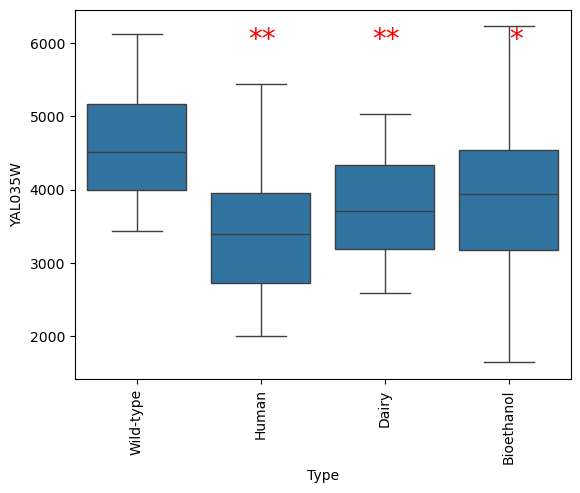

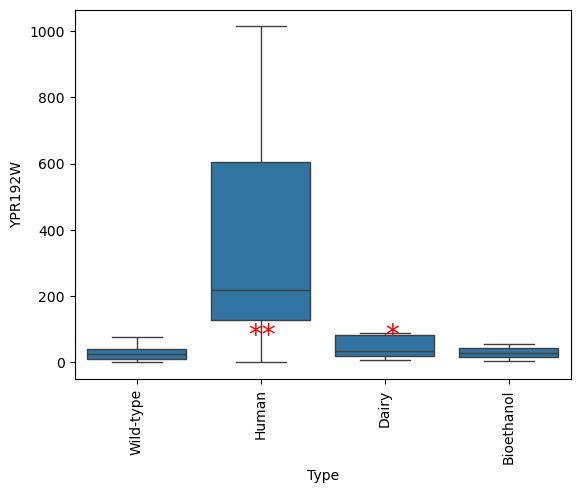

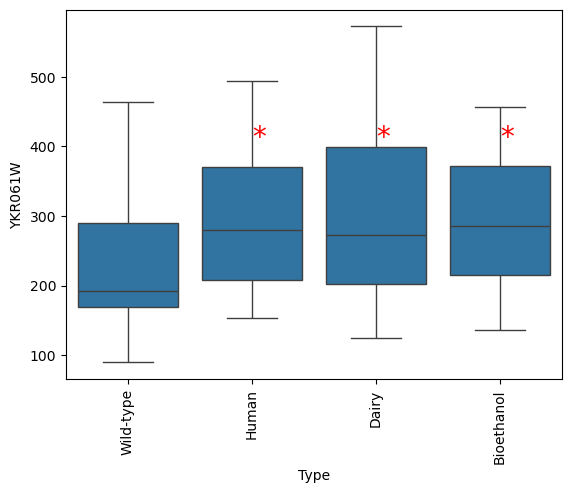

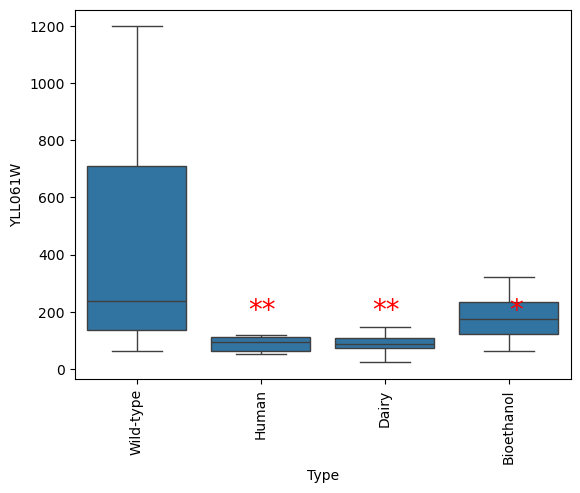

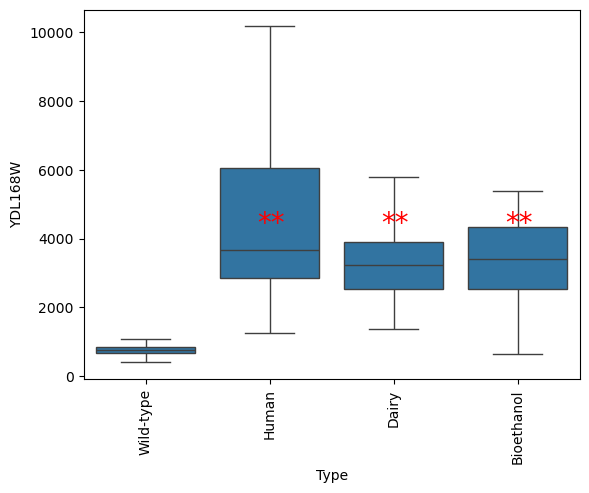

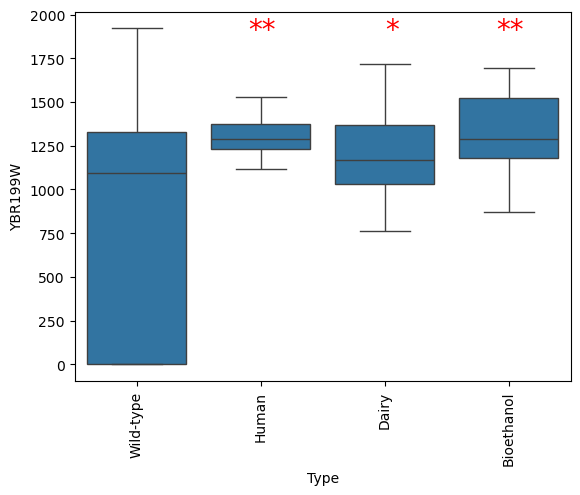

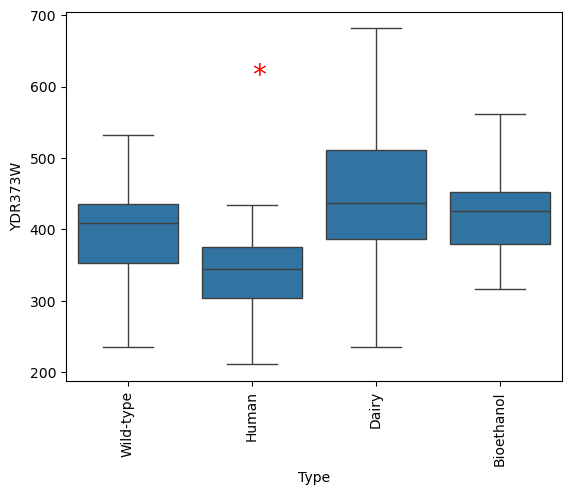

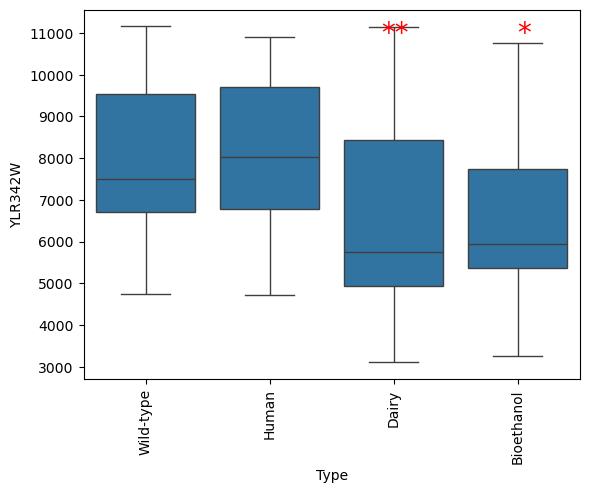

In [119]:
from scipy.stats import ttest_ind
df_met_lof_expMatrix=df_lof_expMatrix[lof_met_geneList+['Type']]

for i in lof_met_geneList:
    p_dict={}
    for type in df_met_lof_expMatrix['Type'].unique():
        p_dict[type]=ttest_ind(df_met_lof_expMatrix[df_met_lof_expMatrix['Type']==type][i],df_met_lof_expMatrix[df_met_lof_expMatrix['Type']=='Wild-type'][i])[1]

    # calculate the p value between different types
    sns.boxplot(data=df_met_lof_expMatrix,x='Type',y=i,showfliers=False)
    plt.xticks(rotation=90)
    max=df_met_lof_expMatrix[i].median()*1.5
    # add p value, if p<0.05, add '*' if p<0.01, add '**'
    for i in range(len(df_met_lof_expMatrix['Type'].unique())):
        if p_dict[df_met_lof_expMatrix['Type'].unique()[i]]<0.01:
            plt.text(i-0.1,max,'**',fontsize=20,color='r')
        elif p_dict[df_met_lof_expMatrix['Type'].unique()[i]]<0.05:
            plt.text(i,max,'*',fontsize=20,color='r')
    plt.show()
# sns.boxplot(data=df_met_lof_expMatrix,x='Type',y=lof_met_geneList[3])
# # sns.violinplot(data=df_met_lof_expMatrix,x='Type',y=lof_met_geneList[3])
# plt.xticks(rotation=90)
# plt.show()

C:\Users\wangh\AppData\Local\Temp\ipykernel_42336\3058787612.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_met_lof_expMatrix,x='Type',y=geneID,showfliers=False,palette=colors_set)
C:\Users\wangh\AppData\Local\Temp\ipykernel_42336\3058787612.py:11: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  sns.boxplot(data=df_met_lof_expMatrix,x='Type',y=geneID,showfliers=False,palette=colors_set)


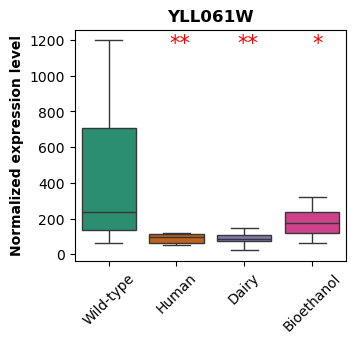

In [131]:
# plot YLL061W
geneID='YLL061W'
fig,ax=plt.subplots(figsize=(3.5,3))
# plot the box plot, and not show outliers
# sns.boxplot(x='Type',y='exp',data=df_growth,ax=ax,showfliers=False)
p_dict={}
for type in df_met_lof_expMatrix['Type'].unique():
    p_dict[type]=ttest_ind(df_met_lof_expMatrix[df_met_lof_expMatrix['Type']==type][geneID],df_met_lof_expMatrix[df_met_lof_expMatrix['Type']=='Wild-type'][geneID])[1]

# calculate the p value between different types
sns.boxplot(data=df_met_lof_expMatrix,x='Type',y=geneID,showfliers=False,palette=colors_set)
plt.xticks(rotation=45)
# add p value, if p<0.05, add '*' if p<0.01, add '**'
for i in range(len(df_met_lof_expMatrix['Type'].unique())):
    if p_dict[df_met_lof_expMatrix['Type'].unique()[i]]<0.01:
        plt.text(i-0.1,1150,'**',fontsize=15,color='r')
    elif p_dict[df_met_lof_expMatrix['Type'].unique()[i]]<0.05:
        plt.text(i,1150,'*',fontsize=15,color='r')
# set y label
plt.ylabel('Normalized expression level',fontdict=label_fontdict)
# set title
plt.title(geneID,fontdict=title_fontdict)
# set x label
plt.xlabel('')
plt.show()

In [141]:
df_lof[df_lof['gene'].str.contains('YLL061W')]

,chromosome,position,QUAL,type,ref,alt,gene,effect,impact_level,LOF,...,CNP_1.re,CNQ_1.re,CNR_1.re,CNS_4.re,CNT_4.re,CNV_4.re,MAL.re,YCM.re,YCR.re,YCY.re
76398,chromosome12,18161,343238.91,DEL,AT,A,YLL061W,frameshift_variant,HIGH,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
df_yll061w=df[df['gene'].str.contains('YLL061W')]

df_yll061w_lof=df_yll061w[df_yll061w['LOF']==1]
df_yll061w

,chromosome,position,QUAL,type,ref,alt,gene,effect,impact_level,LOF,...,CNP_1.re,CNQ_1.re,CNR_1.re,CNS_4.re,CNT_4.re,CNV_4.re,MAL.re,YCM.re,YCR.re,YCY.re
76395,chromosome12,18108,3465905.98,SNV,T,C,YLL061W_CDS,synonymous_variant,LOW,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
76398,chromosome12,18161,343238.91,DEL,AT,A,YLL061W_CDS,frameshift_variant,HIGH,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
76399,chromosome12,18183,2165092.45,SNV,A,G,YLL061W_CDS,synonymous_variant,LOW,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
76400,chromosome12,18371,271563.98,SNV,T,C,YLL061W_CDS,missense_variant,MODERATE,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
76403,chromosome12,18663,445121.80,SNV,T,A,YLL061W_CDS,synonymous_variant,LOW,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
76404,chromosome12,18699,6371186.07,SNV,T,C,YLL061W_CDS,synonymous_variant,LOW,0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0
76405,chromosome12,18974,344380.84,SNV,T,C,YLL061W_CDS,missense_variant,MODERATE,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
76406,chromosome12,19036,337020.44,SNV,G,A,YLL061W_CDS,missense_variant,MODERATE,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
76407,chromosome12,19080,8278518.80,SNV,C,T,YLL061W_CDS,synonymous_variant,LOW,0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
76408,chromosome12,19126,338983.65,SNV,C,G,YLL061W_CDS,missense_variant,MODERATE,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
def calculate_freq(df,strainlist):
    df_data=df[strainlist]
    df_freq=df_data.sum(axis=1)/len(strainlist)
    df_freq.index=df.index
    return df_freq

# calculate the freq
df_yll061w_freq=pd.DataFrame(index=df_yll061w.index)
df_yll061w_freq['WT']=calculate_freq(df_yll061w,wt_strainList)
df_yll061w_freq['Bioethanol']=calculate_freq(df_yll061w,bioethanol_strainList)
df_yll061w_freq['Human']=calculate_freq(df_yll061w,human_strainList)
df_yll061w_freq['Dairy']=calculate_freq(df_yll061w,dairy_strainList)
df_yll061w_freq

,WT,Bioethanol,Human,Dairy
76395,0.90625,0.0000,1.0,0.0
76398,0.00000,0.0000,1.0,0.0
76399,0.43750,0.0000,0.0,0.0
76400,0.00000,0.0000,1.0,0.0
76403,0.06250,0.0000,1.0,0.0
76404,0.62500,0.9375,0.0,1.0
76405,0.00000,0.0000,1.0,0.0
76406,0.00000,0.0000,1.0,0.0
76407,0.18750,0.9375,0.0,1.0
76408,0.00000,0.0000,1.0,0.0


In [14]:
# add effect,impact_level from df_yll061w to df_yll061w_freq
df_yll061w_freq['effect']=df_yll061w['effect']
df_yll061w_freq['impact_level']=df_yll061w['impact_level']
df_yll061w_freq

,WT,Bioethanol,Human,Dairy,effect,impact_level
76395,0.90625,0.0000,1.0,0.0,synonymous_variant,LOW
76398,0.00000,0.0000,1.0,0.0,frameshift_variant,HIGH
76399,0.43750,0.0000,0.0,0.0,synonymous_variant,LOW
76400,0.00000,0.0000,1.0,0.0,missense_variant,MODERATE
76403,0.06250,0.0000,1.0,0.0,synonymous_variant,LOW
76404,0.62500,0.9375,0.0,1.0,synonymous_variant,LOW
76405,0.00000,0.0000,1.0,0.0,missense_variant,MODERATE
76406,0.00000,0.0000,1.0,0.0,missense_variant,MODERATE
76407,0.18750,0.9375,0.0,1.0,synonymous_variant,LOW
76408,0.00000,0.0000,1.0,0.0,missense_variant,MODERATE


Explained variance ratio: [62.7, 16.0]


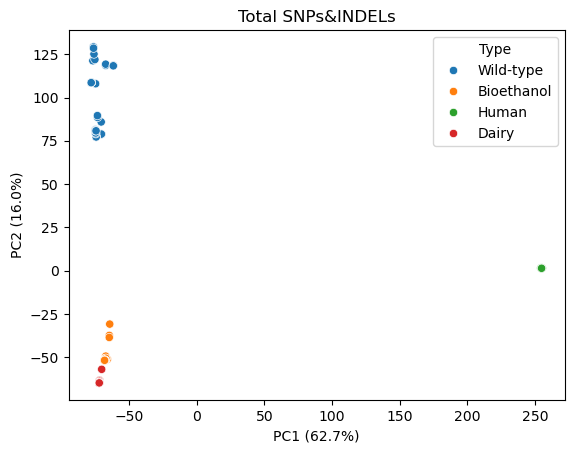

In [ ]:
def pca_analysis(data, label_dict,plot=True,title='PCA'):
    
    total_strainlist=[]
    for list in label_dict.values():
        total_strainlist.extend(list)
    data=data[total_strainlist].T
    # print(data)
    
    for type,list in label_dict.items():
        data.loc[data.index.isin(list), 'Type'] = type
    # print(data['Type'])
    # standardize
    data_st=StandardScaler().fit_transform(data.drop('Type',axis=1))

    # PCA
    pca = PCA(n_components=2)
    principalComponents = pca.fit_transform(data_st)

    pca_explained = pca.explained_variance_ratio_
    pca_explained=[round(i*100,1) for i in pca_explained]

    print('Explained variance ratio:',pca_explained)
    df_output= pd.DataFrame(data = principalComponents
                 , columns = ['PC1', 'PC2'],index=data.index)
    
    # check the contribution of each variable in principal components
    df_contribution=pd.DataFrame(data=pca.components_.T,columns=['PC1','PC2'],index=data.drop('Type',axis=1).columns)
    df_output['Type']=data['Type']
    if plot:
        sns.scatterplot(data=df_output,x='PC1',y='PC2',hue='Type')
        plt.title(title)
        # set label
        plt.xlabel('PC1 ({}%)'.format(pca_explained[0]))
        plt.ylabel('PC2 ({}%)'.format(pca_explained[1]))
        plt.show()

    return df_contribution
df_whole_pca=pca_analysis(df,label_dict,title='Total SNPs&INDELs')


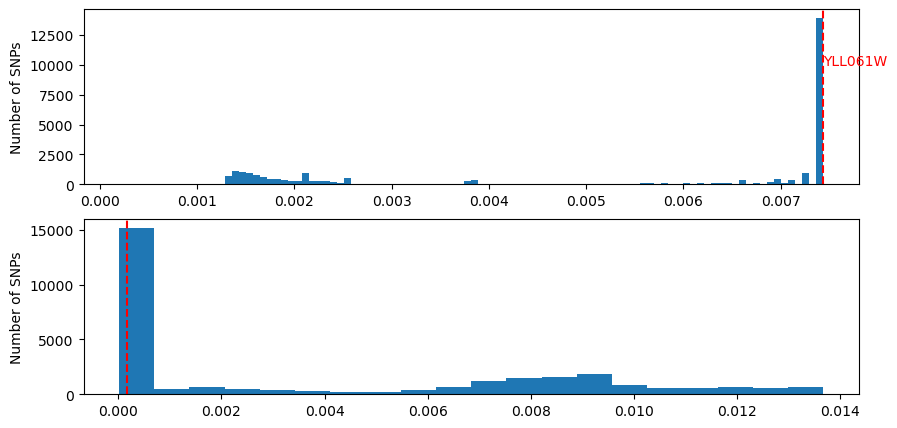

In [37]:
# plot the distribution of each type
fig,axes=plt.subplots(2,1,figsize=(10,5))
df_whole_pca['PC1'].abs().plot(kind='hist',bins=100,ax=axes[0])
# mark the x=0.007439
axes[0].axvline(x=0.007439, color='r', linestyle='--')
# text annotation
axes[0].text(0.007439, 10000, 'YLL061W', fontsize=10, color='r')
# set y label
axes[0].set_ylabel('Number of SNPs')
df_whole_pca['PC2'].abs().plot(kind='hist',bins=20,ax=axes[1])
# mark the x=0.000159
axes[1].axvline(x=0.000159, color='r', linestyle='--')
# set y label
axes[1].set_ylabel('Number of SNPs')
plt.show()

In [22]:
df_whole_pca.loc[df_yll061w_lof.index]

,PC1,PC2
76398,0.007439,0.000159
76411,0.007439,0.000159


In [31]:
# print the rank of 76398 in PC1
df_whole_pca['PC1'].abs().sort_values(ascending=False).index.get_loc(76411)


2189